##Técnicas de modelagem de ML para predição dos volumes acumulados no sistema de reservação Cantareira, de 01-01-2000 a 25-03-2023

##ETL

###Importando bibliotecas e pacotes para ETL

In [1]:
import pandas as pd

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

###Extração da base de dados

In [2]:
cantareira = pd.read_csv('https://raw.githubusercontent.com/JoiceO/ciencia-de-dados/master/TCC/dados_artigo_full.csv')

In [3]:
cantareira.shape #total de linhas e colunas

(8485, 9)

In [4]:
cantareira.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8485 entries, 0 to 8484
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8485 non-null   int64  
 1   data          8485 non-null   object 
 2   volume        8485 non-null   float64
 3   chuva         8485 non-null   float64
 4   temp.max      8485 non-null   int64  
 5   diff          8484 non-null   float64
 6   medMov.chuva  8471 non-null   float64
 7   medMov.diff   8470 non-null   float64
 8   medMov.temp   8471 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 596.7+ KB


In [5]:
cantareira.head(5)

,Unnamed: 0,data,volume,chuva,temp.max,diff,medMov.chuva,medMov.diff,medMov.temp
0,1,2000-01-01,365.50555,30.900,32,NaN,NaN,NaN,NaN
1,2,2000-01-02,370.64646,29.100,27,5.14091,NaN,NaN,NaN
2,3,2000-01-03,377.00187,35.175,25,6.35541,NaN,NaN,NaN
3,4,2000-01-04,387.88206,18.725,24,10.88019,NaN,NaN,NaN
4,5,2000-01-05,403.00251,25.900,24,15.12045,NaN,NaN,NaN


###Tratamento

In [6]:
#renomeando a primeira coluna para 'id' e a coluna 'temp.max' para tempMax'
cantareira = cantareira.rename(columns={'Unnamed: 0': 'id', 'temp.max': 'tempMax'})

In [7]:
#checando valores NaN e substituindo por zero
cantareira.isnull().sum()

id               0
data             0
volume           0
chuva            0
tempMax          0
diff             1
medMov.chuva    14
medMov.diff     15
medMov.temp     14
dtype: int64

In [8]:
cantareira['diff'] = cantareira['diff'].fillna(0)
cantareira['medMov.chuva'] = cantareira['medMov.chuva'].fillna(0)
cantareira['medMov.diff'] = cantareira['medMov.diff'].fillna(0)
cantareira['medMov.temp'] = cantareira['medMov.temp'].fillna(0)

cantareira.isnull().sum()  #resultado abaixo em que as 4 ultimas colunas sao atualizadas

id              0
data            0
volume          0
chuva           0
tempMax         0
diff            0
medMov.chuva    0
medMov.diff     0
medMov.temp     0
dtype: int64

In [9]:
#para series temporais, precisamos transformar a coluna 'data' de object para datetime 
cantareira['data'] = pd.to_datetime(cantareira['data'])
print(cantareira['data'])

0      2000-01-01
1      2000-01-02
2      2000-01-03
3      2000-01-04
4      2000-01-05
          ...    
8480   2023-03-21
8481   2023-03-22
8482   2023-03-23
8483   2023-03-24
8484   2023-03-25
Name: data, Length: 8485, dtype: datetime64[ns]


###Carregamento

In [10]:
cantareira.info() #resultado da limpeza com total de 9 colunas e 8485 registros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8485 entries, 0 to 8484
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            8485 non-null   int64         
 1   data          8485 non-null   datetime64[ns]
 2   volume        8485 non-null   float64       
 3   chuva         8485 non-null   float64       
 4   tempMax       8485 non-null   int64         
 5   diff          8485 non-null   float64       
 6   medMov.chuva  8485 non-null   float64       
 7   medMov.diff   8485 non-null   float64       
 8   medMov.temp   8485 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 596.7 KB


5 primeiras e 5 últimas linhas da base de dados tratada

In [11]:
cantareira.head(5)

,id,data,volume,chuva,tempMax,diff,medMov.chuva,medMov.diff,medMov.temp
0,1,2000-01-01,365.50555,30.900,32,0.00000,0.0,0.0,0.0
1,2,2000-01-02,370.64646,29.100,27,5.14091,0.0,0.0,0.0
2,3,2000-01-03,377.00187,35.175,25,6.35541,0.0,0.0,0.0
3,4,2000-01-04,387.88206,18.725,24,10.88019,0.0,0.0,0.0
4,5,2000-01-05,403.00251,25.900,24,15.12045,0.0,0.0,0.0


In [12]:
cantareira.tail(5)

,id,data,volume,chuva,tempMax,diff,medMov.chuva,medMov.diff,medMov.temp
8480,8481,2023-03-21,788.1430,5.9,30,4.91407,7.366667,5.106556,28.60000
8481,8482,2023-03-22,790.2597,0.0,30,2.11669,6.853333,4.726079,28.66667
8482,8483,2023-03-23,791.5365,0.0,30,1.27676,6.306667,4.451279,28.66667
8483,8484,2023-03-24,792.5866,0.0,32,1.05013,5.300000,4.081039,28.80000
8484,8485,2023-03-25,793.7210,0.0,31,1.13444,5.140000,3.891435,29.00000


####Colunas do dataset `cantareira`


*   id = número da observação  <br>
*   data = data da observação <br>
*   volume = volume do manancial no dia da observação  <br> 
* chuva = pluviometria no dia da observação  <br>
* tempMax = temperatura máxima no dia da observação   <br>
* diff = diferença diária do volume do manancial entre o dia N e N-1 <br>
* medMov.chuva = média móvel de 15 dias da pluviometria  <br>
* medMov.diff = média móvel de 15 dias da diferença volumétrica   <br>
* medMov.temp = média móvel de 15 dias da temperatura máxima



In [13]:
cantareira.to_csv('cantareira-tratado-full.csv')

##EDA

###Importando bibliotecas e pacotes para EDA

In [14]:
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns 

In [15]:
cantareira.describe()

,id,volume,chuva,tempMax,diff,medMov.chuva,medMov.diff,medMov.temp
count,8485.00000,8485.000000,8485.000000,8485.000000,8485.000000,8.485000e+03,8485.000000,8485.000000
mean,4243.00000,431.892753,3.890913,26.605421,0.050467,3.873454e+00,0.041944,26.557054
std,2449.55285,250.607798,8.268712,4.158898,3.320754,3.532680e+00,1.943819,2.877918
min,1.00000,-238.840200,0.000000,10.000000,-13.807060,-1.574666e-15,-4.560029,0.000000
25%,2122.00000,303.683650,0.000000,24.000000,-1.435630,9.800000e-01,-1.258689,24.666667
50%,4243.00000,439.972700,0.050000,27.000000,-0.649940,2.948333e+00,-0.456352,26.733333
75%,6364.00000,570.675000,3.600000,30.000000,0.693010,5.882000e+00,0.802273,28.533330
max,8485.00000,987.050160,102.000000,37.000000,207.245490,2.632000e+01,12.873420,34.266670


###Tendências e sazonalidades do volume de água do manancial

[Text(0.5, 0, 'Período'), Text(0, 0.5, 'Volume acumulado médio quinzenal')]

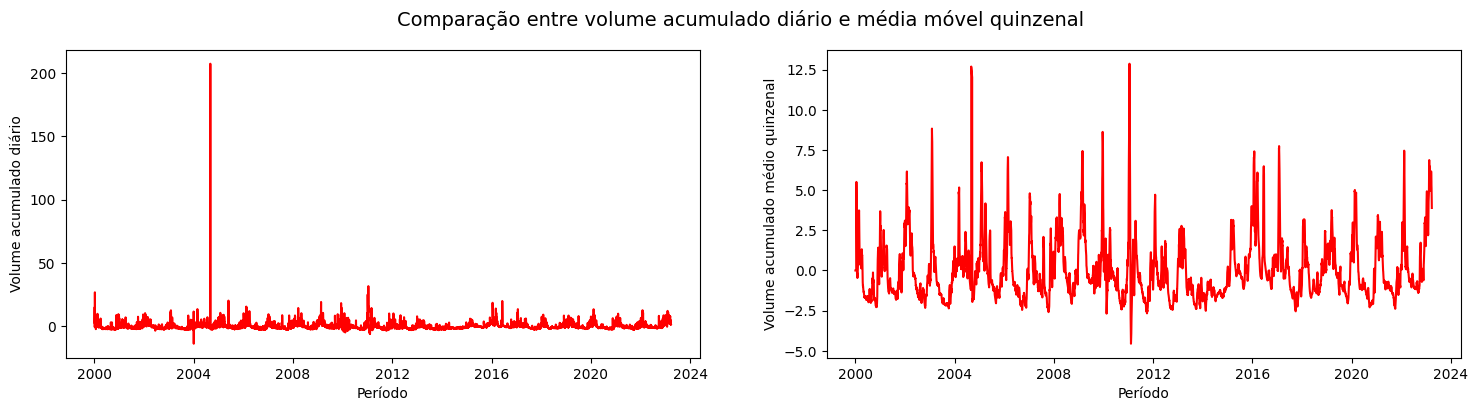

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(18,4))
fig.suptitle('Comparação entre volume acumulado diário e média móvel quinzenal',fontsize=14)

volume = sns.lineplot(ax=axes[0], x='data', y= 'diff', data=cantareira, color='red')
meanVolume = sns.lineplot(ax=axes[1], x='data', y= 'medMov.diff', data=cantareira, color='red')

#rotulos dos eixos
volume.set(xlabel='Período', ylabel='Volume acumulado diário')

meanVolume.set(xlabel='Período', ylabel='Volume acumulado médio quinzenal')

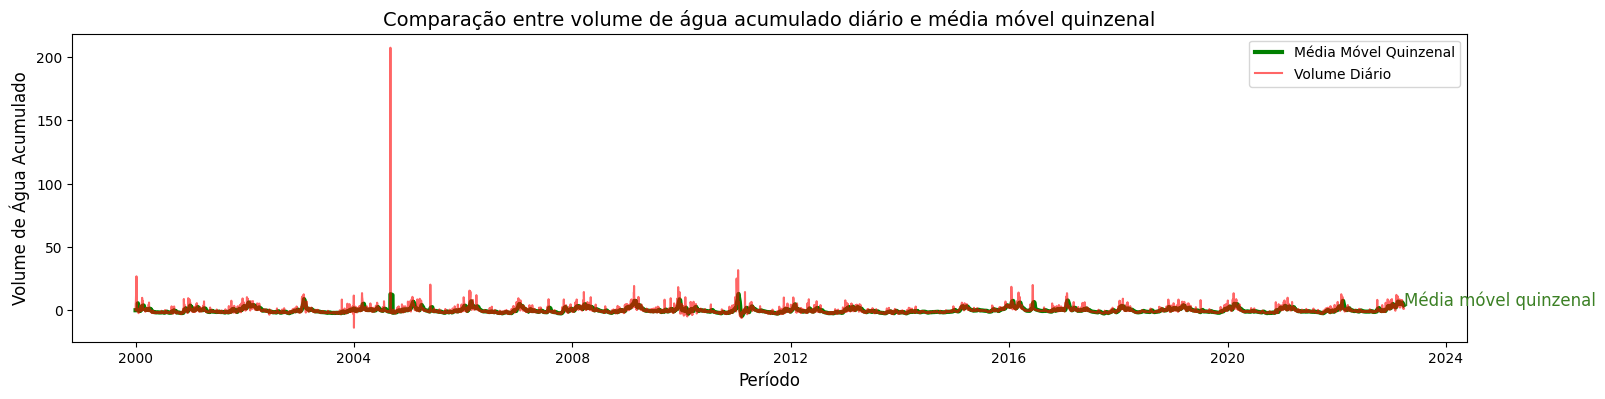

In [17]:
#alterar o tamanho
plt.figure(figsize=(18,4))

#titulo
plt.title('Comparação entre volume de água acumulado diário e média móvel quinzenal', loc='center', fontsize=14)

#eixo x
cantareira.index = cantareira['data']

#plotar a media movel
plt.plot(cantareira.index, cantareira['medMov.diff'], linewidth=3, color='green')

#incluir o nome da linha
plt.text(cantareira.index[-1], cantareira['medMov.diff'].tail(1), 'Média móvel quinzenal', color='#3b8024', fontsize = 12)

#plotar o valor diario
plt.plot(cantareira.index, cantareira['diff'], alpha=0.6, color='red')

#eixos
plt.xlabel('Período', fontsize=12)
plt.ylabel('Volume de Água Acumulado', fontsize=12)

#legenda
plt.legend(['Média Móvel Quinzenal', 'Volume Diário'])

###Tendências e sazonalidades da precipitação sobre o manancial

[Text(0.5, 0, 'Período'), Text(0, 0.5, 'Pluviometria média quinzenal')]

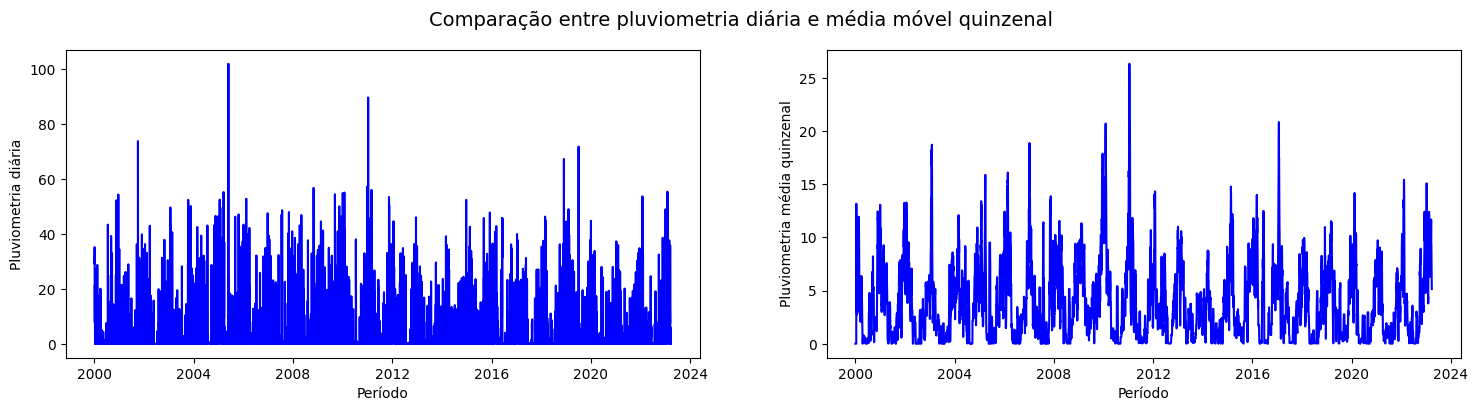

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
fig.suptitle('Comparação entre pluviometria diária e média móvel quinzenal',fontsize=14)
chuva = sns.lineplot(ax=axes[0], x='data', y= 'chuva', data=cantareira, color='blue')
meanChuva = sns.lineplot(ax=axes[1], x='data', y= 'medMov.chuva', data=cantareira, color='blue')

#eixos
chuva.set(xlabel='Período',
       ylabel='Pluviometria diária')

meanChuva.set(xlabel='Período',
       ylabel='Pluviometria média quinzenal')

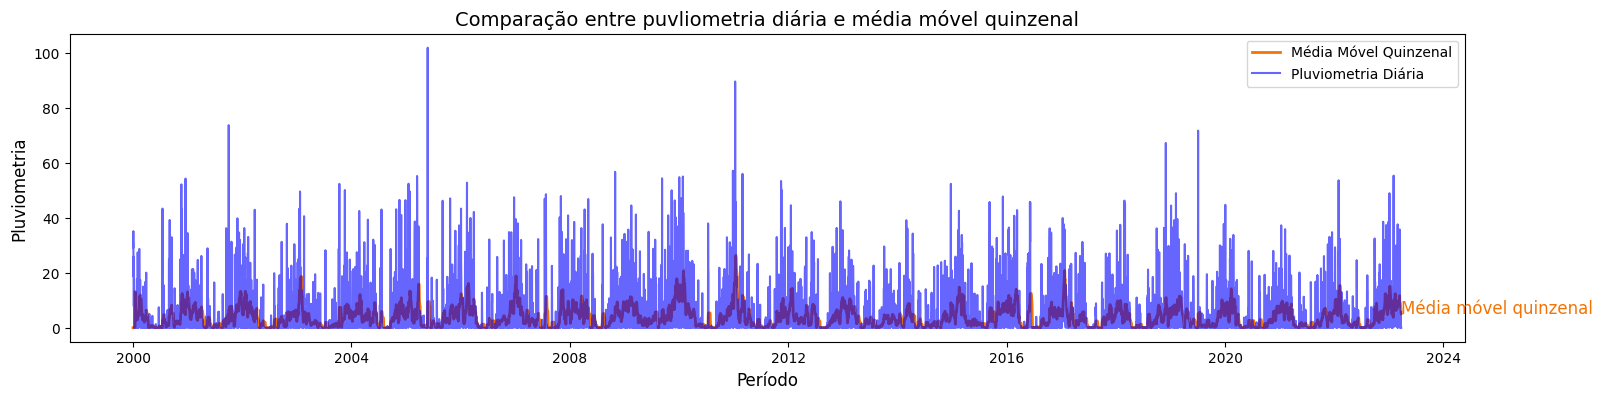

In [19]:
#alterar o tamanho
plt.figure(figsize=(18,4))

#titulo
plt.title('Comparação entre puvliometria diária e média móvel quinzenal', loc='center', fontsize=14)


#eixo x
cantareira.index = cantareira['data']

#plotar a media movel
plt.plot(cantareira.index, cantareira['medMov.chuva'], linewidth=2, color='#f27405')

#incluir o nome da linha
plt.text(cantareira.index[-1], cantareira['medMov.chuva'].tail(1), 'Média móvel quinzenal', color='#f27405', fontsize = 12)

#plotar o valor diario
plt.plot(cantareira.index, cantareira['chuva'], alpha=0.6, color='blue')

#eixos
plt.xlabel('Período', fontsize=12)
plt.ylabel('Pluviometria', fontsize=12)

#legenda
plt.legend(['Média Móvel Quinzenal', 'Pluviometria Diária'])

###Tendências e sazonalidades da temperatura em torno do manancial

[Text(0.5, 0, 'Período'), Text(0, 0.5, 'Temperatura média quinzenal')]

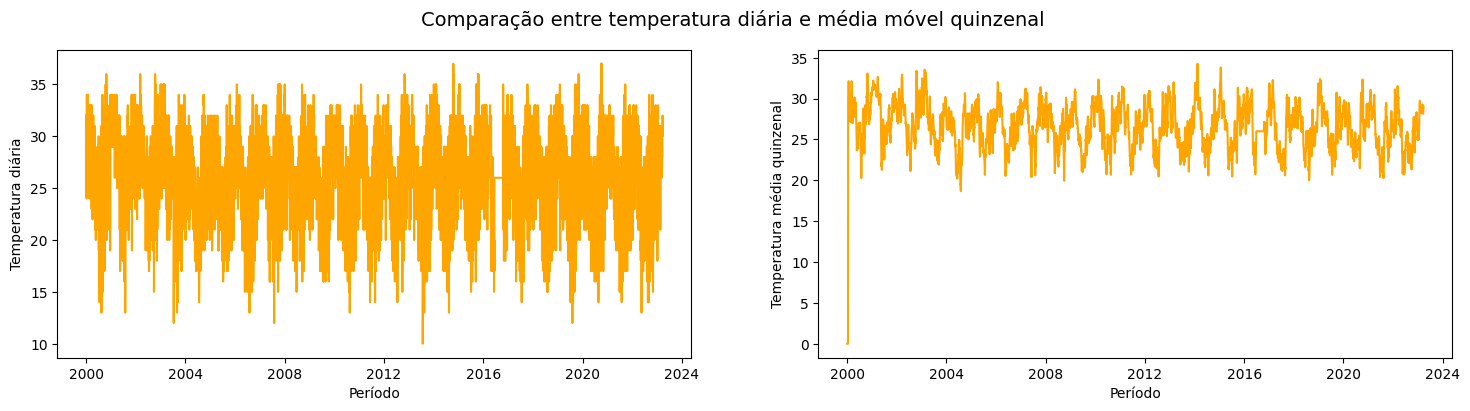

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
fig.suptitle('Comparação entre temperatura diária e média móvel quinzenal',fontsize=14)

temp = sns.lineplot(ax=axes[0], x='data', y= 'tempMax', data=cantareira, color='orange')
meantemp = sns.lineplot(ax=axes[1], x='data', y= 'medMov.temp', data=cantareira, color='orange')

#eixos
temp.set(xlabel='Período',
       ylabel='Temperatura diária')

meantemp.set(xlabel='Período',
       ylabel='Temperatura média quinzenal')

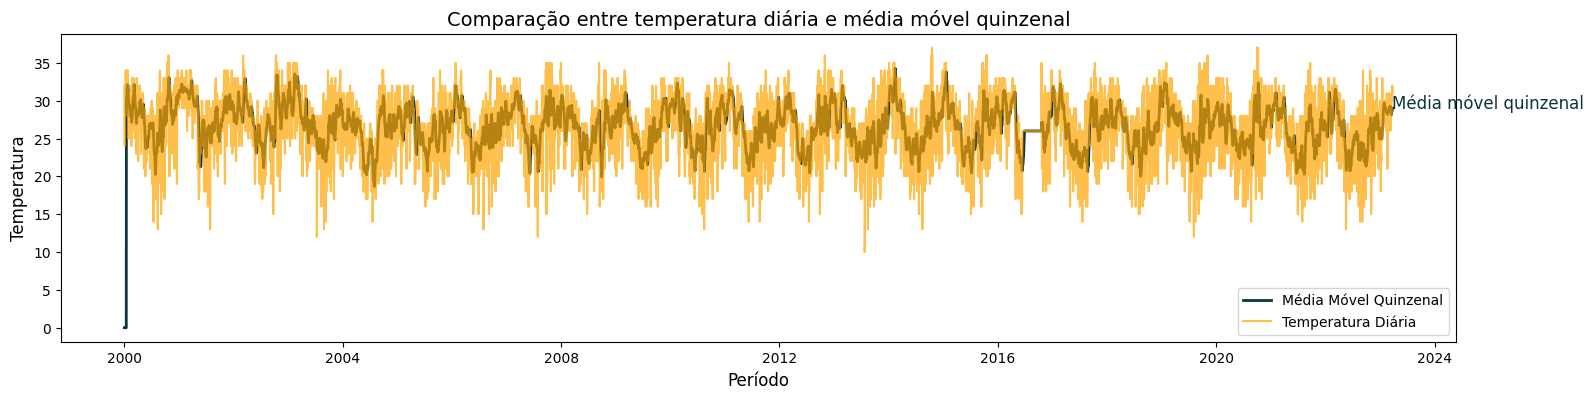

In [21]:
#alterar o tamanho
plt.figure(figsize=(18,4))

#titulo
plt.title('Comparação entre temperatura diária e média móvel quinzenal', loc='center', fontsize=14)

#eixo x
cantareira.index = cantareira['data']

#plotar a media movel
plt.plot(cantareira.index, cantareira['medMov.temp'], linewidth=2, color='#0c333b')

#incluir o nome da linha
plt.text(cantareira.index[-1], cantareira['medMov.temp'].tail(1), 'Média móvel quinzenal', color='#0c333b', fontsize = 12)

#plotar o valor diario
plt.plot(cantareira.index, cantareira['tempMax'], alpha=0.7, color='orange')

#eixos
plt.xlabel('Período', fontsize=12)
plt.ylabel('Temperatura', fontsize=12)

#legenda
plt.legend(['Média Móvel Quinzenal', 'Temperatura Diária'])

###Verificando relação entre as 3 variáveis

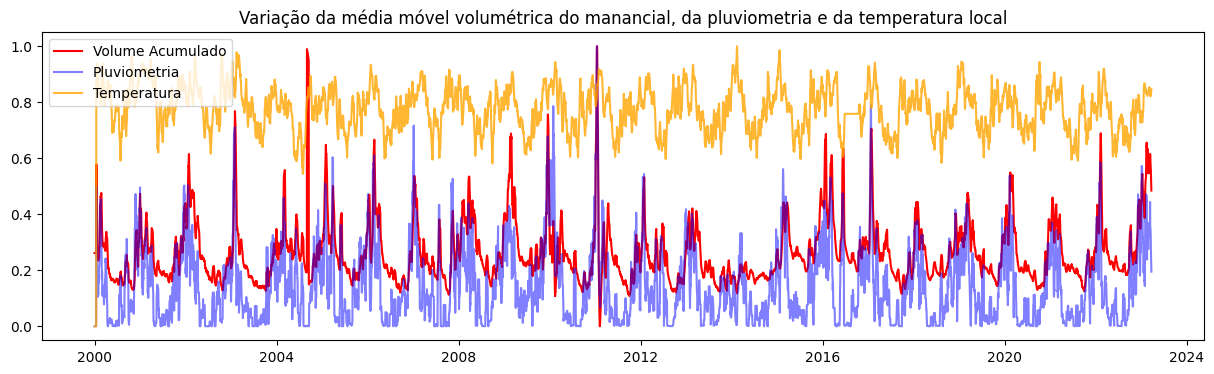

In [22]:
x = cantareira['data']
y1 = cantareira['medMov.diff']
y2 = cantareira['medMov.chuva']
y3 = cantareira['medMov.temp']

#normalizacao das variaves
scaler = MinMaxScaler()
y1_norm = scaler.fit_transform(y1.values.reshape(-1,1))
y2_norm = scaler.fit_transform(y2.values.reshape(-1,1))
y3_norm = scaler.fit_transform(y3.values.reshape(-1,1))

#grafico normalizado
plt.figure(figsize=(15, 4))
plt.plot(x, y1_norm, label='medMov.diff', color ='red')  
plt.plot(x, y2_norm, label='medMov.chuva', alpha = 0.5, color='blue')  
plt.plot(x, y3_norm, label='medMov.temp', alpha = 0.8, color='orange')
plt.title("Variação da média móvel volumétrica do manancial, da pluviometria e da temperatura local", fontsize=12)
plt.legend(['Volume Acumulado', 'Pluviometria', 'Temperatura'], loc='upper left')

###Verificando correlação

In [23]:
cantareira.corr()

,id,volume,chuva,tempMax,diff,medMov.chuva,medMov.diff,medMov.temp
id,1.000000,0.055823,-0.017020,-0.093849,0.018165,-0.029738,0.034948,-0.109958
volume,0.055823,1.000000,-0.023207,-0.064484,0.015586,-0.004299,0.072419,-0.082498
chuva,-0.017020,-0.023207,1.000000,-0.023629,0.422009,0.388436,0.180869,0.145800
tempMax,-0.093849,-0.064484,-0.023629,1.000000,0.009732,0.186429,0.178784,0.514093
diff,0.018165,0.015586,0.422009,0.009732,1.000000,0.479272,0.531423,0.106392
medMov.chuva,-0.029738,-0.004299,0.388436,0.186429,0.479272,1.000000,0.703945,0.315255
medMov.diff,0.034948,0.072419,0.180869,0.178784,0.531423,0.703945,1.000000,0.211865
medMov.temp,-0.109958,-0.082498,0.145800,0.514093,0.106392,0.315255,0.211865,1.000000


In [24]:
#funcao para padronizar o grafico de dispersao
def scatter_plot_df(x_var, y_var, title):
# definicao do grafico de barras
  fig = plt.figure(figsize = (8,4))

  sns.scatterplot(x=x_var, y=y_var, data = cantareira)

  # definicao dos nomes dos eixos e titulo
  plt.xlabel(x_var, fontsize = 12)
  plt.ylabel(y_var, fontsize = 12)

  plt.title(title, fontsize = 12)

  plt.show()

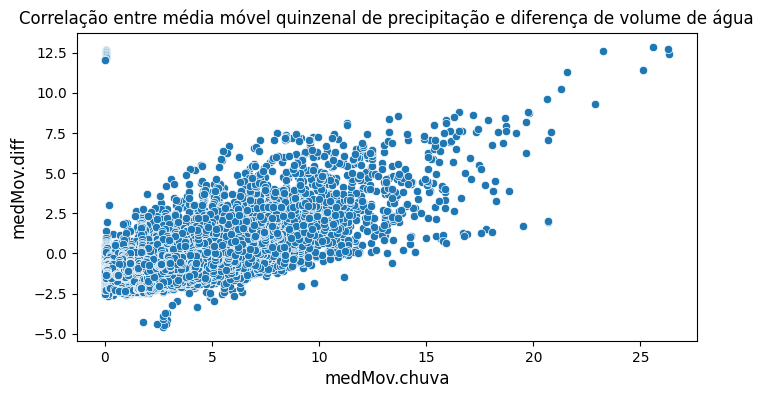

In [25]:
#dispersao entre medMov.chuva e diff
scatter_plot_df('medMov.chuva', 'medMov.diff', 'Correlação entre média móvel quinzenal de precipitação e diferença de volume de água')


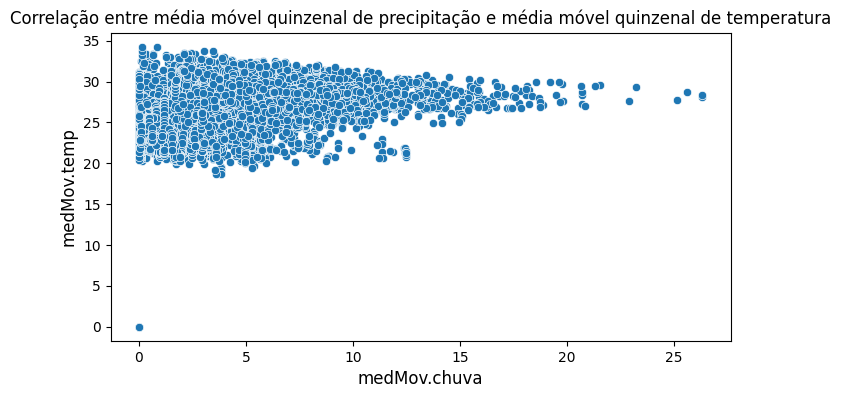

In [26]:
#dispersao entre medMov.temp e medMov.chuva
scatter_plot_df('medMov.chuva', 'medMov.temp', 'Correlação entre média móvel quinzenal de precipitação e média móvel quinzenal de temperatura')

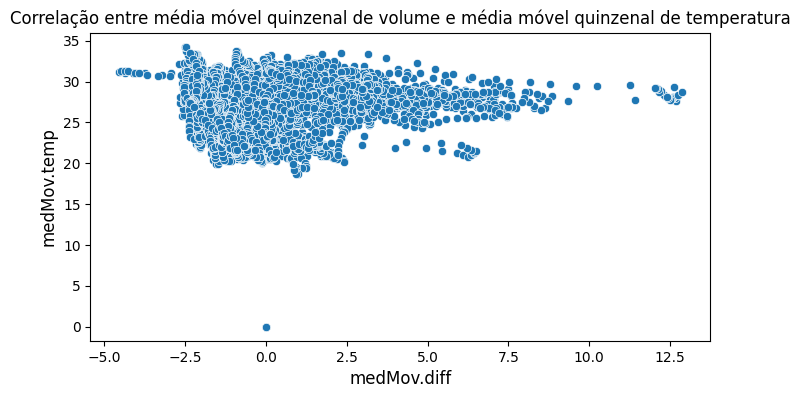

In [27]:
#dispersao entre medMov.temp e medMov.diff
scatter_plot_df('medMov.diff', 'medMov.temp', 'Correlação entre média móvel quinzenal de volume e média móvel quinzenal de temperatura')

###Verificando outliers

<Axes: >

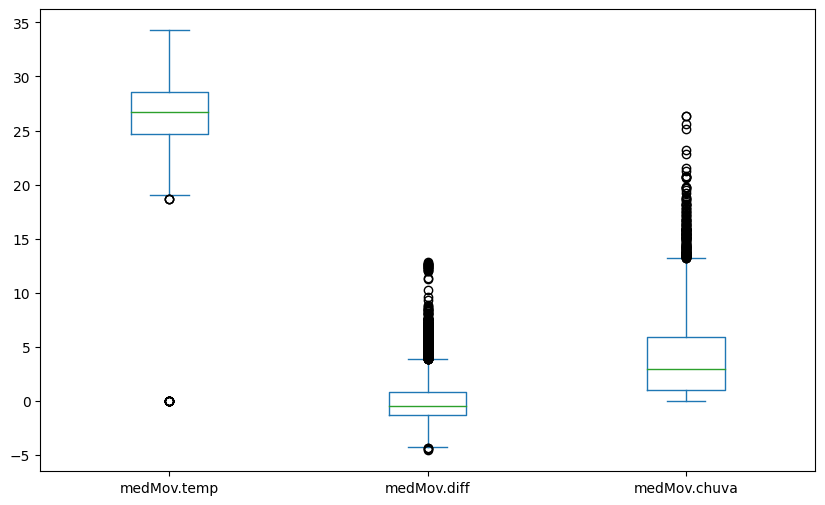

In [28]:
cantareira[['medMov.temp', 'medMov.diff', 'medMov.chuva']].plot.box(figsize=(10,6))

##Aprendizado de Máquina

###Importando bibliotecas e pacotes para ML

In [29]:
import numpy as np

import random

#regressao linear multipla
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #divisao da base de dados em conjuntos de treino e de teste
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn import metrics

import statsmodels.api as sm

#GAM
!pip install pygam
from pygam import LinearGAM, GAM

#decision tree e random forest
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score, ShuffleSplit #tambem usado em cross-validation
from sklearn.ensemble import RandomForestRegressor

#GBM
from sklearn.ensemble import GradientBoostingRegressor

#SVM
from sklearn.svm import SVR

#redes neurais
from sklearn.neural_network import MLPRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Técnicas de Modelagem Tradicionais

Há duas variáveis preditoras, 'chuva' e 'tempMax', e uma variável dependente, que seria 'diff' (volume). Vamos usar suas médias móveis.

####Regressão Linear Múltipla

In [87]:
#r² ajustado
def adjusted_r2(y_test, y_pred,X_train):
    
  adj_r2 = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / 
          (len(y_test) - X_train.shape[1] - 1))
    
  return adj_r2

In [88]:
#separando variaveis independentes (X) e a variavel dependente (y)
X = cantareira[['medMov.chuva', 'medMov.temp']] # variaveis independentes
y = cantareira['medMov.diff'] # variavel dependente

#divisao do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo de regressao linear multipla
regressao = LinearRegression()
regressao.fit(X_train, y_train)

#previsoes no conjunto de teste
y_pred = regressao.predict(X_test)

#metricas de avaliacao de desempenho do modelo
mse = mean_squared_error(y_test, y_pred) 
adjr2 = adjusted_r2(y_test, y_pred,X_train)
print("MSE - erro quadrático médio:", mse)
print("R² - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 1.833545663658089
R² - coeficiente de determinação ajustado: 0.49545895381826877


####Decision Tree

In [89]:
#preparacao modelagem
divisao = np.random.rand(len(cantareira)) < 0.70
df_treinamento = cantareira[divisao]
df_teste = cantareira[~divisao]

#divisao do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo decision tree
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

#previsao
y_pred = regressor.predict(X_test)

#metricas de avaliacao de desempenho do modelo
mse = mean_squared_error(y_test, y_pred) 
adjr2 = adjusted_r2(y_test, y_pred,X_train)
print("MSE - erro quadrático médio:", mse)
print("R² - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 2.8316429667952097
R² - coeficiente de determinação ajustado: 0.2208101858616105


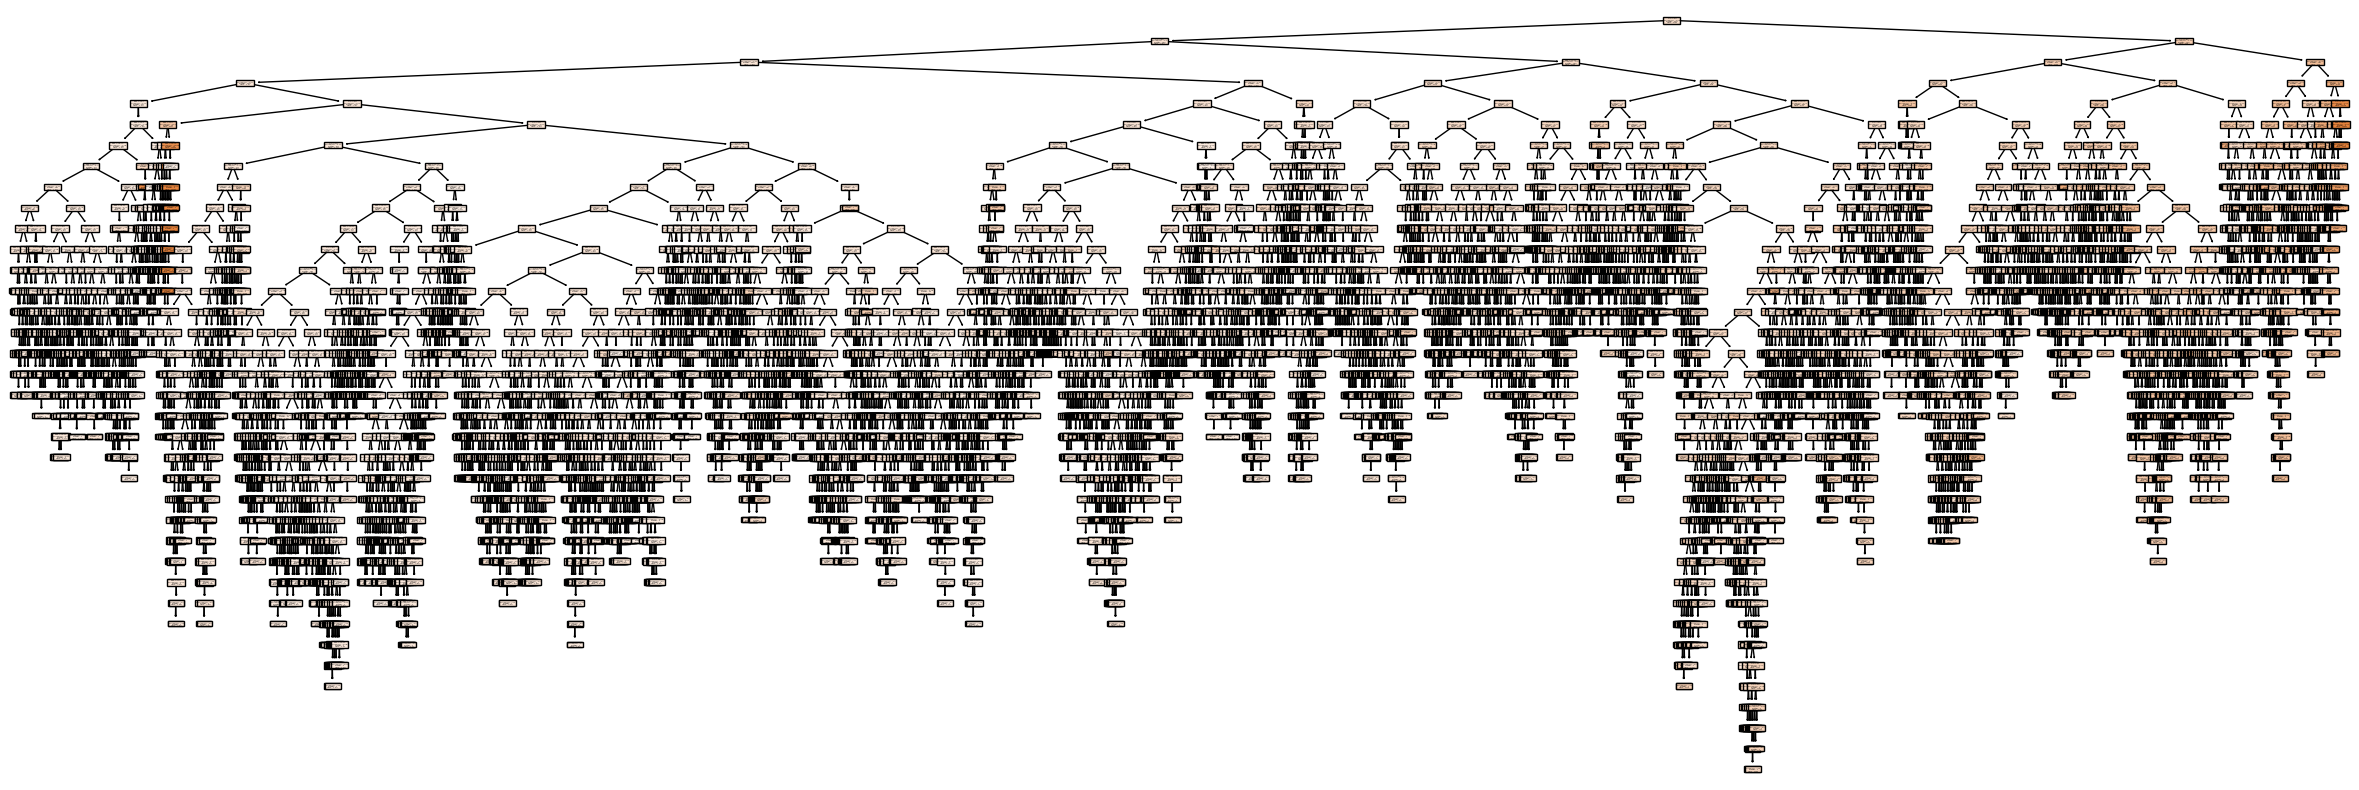

In [34]:
#visualizando a arvore de decisao
fig = plt.figure(figsize=(30,10)) 
_ = tree.plot_tree(regressor, feature_names=cantareira.columns[:-1], filled=True)
plt.show()

#####Verificação do decaimento de erro e necessidade de poda (melhor desempenho de previsão do modelo evitando overfiting).

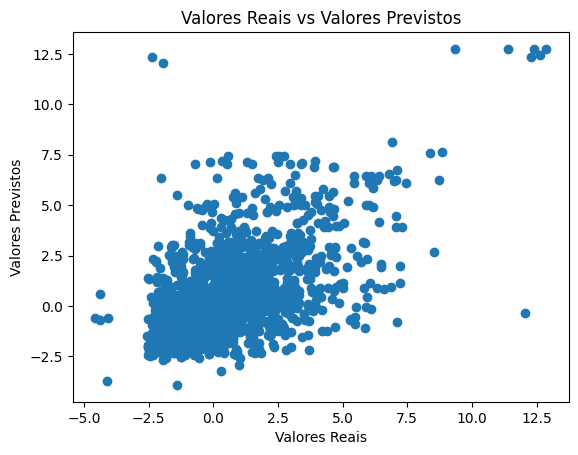

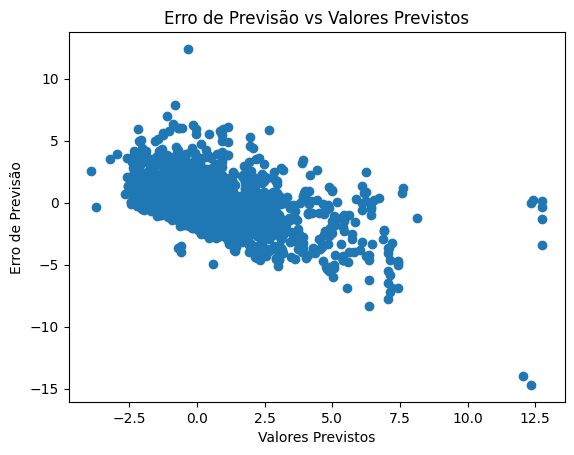

In [35]:
#VERIFICACAO DO DECAIMENTO DO ERRO
#calculo do erro de previsao
erro = y_test - y_pred

#grafico de dispersão dos valores reais vs os valores previstos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Valores Previstos')
plt.show()

#grafico de dispersao dos residuos vs os valores previstos
plt.scatter(y_pred, erro)
plt.xlabel('Valores Previstos')
plt.ylabel('Erro de Previsão')
plt.title('Erro de Previsão vs Valores Previstos')
plt.show()

In [36]:
#PODA POR REDUCAO DE ERRO MINIMO EM 0.02 (minimum error reduction - MER)
regressor = DecisionTreeRegressor(ccp_alpha=0.02)
regressor.fit(X_train, y_train)

#previsao
previsoes = regressor.predict(X_test)

#metricas de avaliacao de desempenho do modelo
mse = mean_squared_error(y_test, previsoes) 
r2 = r2_score(y_test, previsoes)
print("MSE - erro quadrático médio:", mse)
print("R² Score - coeficiente de determinação:", r2)

MSE - erro quadrático médio: 1.7878728982857777
R² Score - coeficiente de determinação: 0.5084134548086248


###Técnicas de Modelagem Avançadas

####Random Forest

In [90]:
#divisao do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo de Random Forest
forest = RandomForestRegressor(n_estimators=80, max_features=2)
forest.fit(X_train, y_train)

#previsoes no conjunto de teste
y_pred = forest.predict(X_test)

#metrica de avaliacao de desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
adjr2 = adjusted_r2(y_test, y_pred,X_train)
print("MSE - erro quadrático médio:", mse)
print("R² - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 1.642584451591501
R² - coeficiente de determinação ajustado: 0.5480061969144594


In [38]:
#feature importances
importancia = forest.feature_importances_

#novo dataframe que traz as variaveis e seu peso de importancia
importancia_df = pd.DataFrame({'Variável': X_train.columns, 'Importância': importancia})
importancia_df = importancia_df.sort_values('Importância', ascending=False) #ordenar por ordem decrescente

#variaveis mais importantes
print("Variáveis mais importantes no modelo de Random Forest:")
print(importancia_df.head())  

Variáveis mais importantes no modelo de Random Forest:
       Variável  Importância
0  medMov.chuva     0.772227
1   medMov.temp     0.227773


####Gradient Boosting Machine - GBM

In [92]:
#separando variaveis independentes (X) e a variavel dependente (y)
X = cantareira[['medMov.chuva', 'medMov.temp']] # variaveis independentes
y = cantareira['medMov.diff'] # variavel dependente

#divisao do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo GBM
gbm = GradientBoostingRegressor()

#treinando o modelo GBM
gbm.fit(X_train, y_train)

#previsao
y_pred = gbm.predict(X_test)

#metrica de avaliacao de desempenho do modelo
mse = mean_squared_error(y_test, y_pred) 
adjr2 = adjusted_r2(y_test, y_pred,X_train)
print("MSE - erro quadrático médio:", mse)
print("R² - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 1.5861185263565236
R² - coeficiente de determinação ajustado: 0.5635440575504667


####Suppor Vector Machine - SVM

In [94]:
#divisao em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo SVM
svm = SVR(kernel='linear', C=0.7)

#treinando o modelo
svm.fit(X_train, y_train)

#previsao
y_pred = svm.predict(X_test)

#metricas de avaliacao de desempenho do modelo
mse = mean_squared_error(y_test, y_pred) 
adjr2 = adjusted_r2(y_test, y_pred,X_train)
print("MSE - erro quadrático médio:", mse)
print("R² - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 1.8615432675029298
R² - coeficiente de determinação ajustado: 0.4877547877238857


####Rede Neural MLP - Multi Layer Perceptron

In [95]:
#separando variaveis independentes (X) e a variavel dependente (y)
X = cantareira[['medMov.chuva', 'medMov.temp']] # variaveis independentes
y = cantareira['medMov.diff'] # variavel dependente

#divisao do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#modelo MLPRegressor 
modeloNN = MLPRegressor(hidden_layer_sizes=(50, 50, 10), #3 camadas com 50, 50 e 10 neuronios 
                   activation='relu',
                   max_iter=700, #700 epocas
                   random_state=42)

#treinando o modelo
modeloNN.fit(X_train, y_train)

#previsao
y_pred = modeloNN.predict(X_test)

#metricas de avaliacao de desempenho do modelo
mse = mean_squared_error(y_test, y_pred) 
adjr2 = adjusted_r2(y_test, y_pred,X_train)
print("MSE - erro quadrático médio:", mse)
print("R² - coeficiente de determinação ajustado:", adjr2)

MSE - erro quadrático médio: 1.8217383857141731
R² - coeficiente de determinação ajustado: 0.49870799008960787


###Validação Cruzada - 10 folds e 30 seeds

In [97]:
#separando variaveis independentes (X) e a variavel dependente (y)
X = cantareira[['medMov.chuva', 'medMov.temp']] # variaveis independentes
y = cantareira['medMov.diff'] # variavel dependente

#modelos
regressao 
regressor 
forest 
gbm 
svm 
modeloNN

#validacao cruzada com 10 folds e 30 seeds
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

#validacao cruzada
regressao_scores = cross_val_score(regressao, X, y, cv=cv)
regressor_scores = cross_val_score(regressor, X, y, cv=cv)
forest_scores = cross_val_score(forest, X, y, cv=cv)
gbm_scores = cross_val_score(gbm, X, y, cv=cv)
svm_scores = cross_val_score(svm, X, y, cv=cv)
modeloNN_scores = cross_val_score(modeloNN, X, y, cv=cv)


#resultados
print("Regressão Linear Múltipla - Média do R² Ajustado: ", regressao_scores.mean())
print("Decision Tree - Média do R² Ajustado: ", regressor_scores.mean())
print("Random Forest - Média do R² Ajustado: ", forest_scores.mean())
print("GBM - Média do R² Ajustado: ", gbm_scores.mean())
print("SVM - Média do R² Ajustado: ", svm_scores.mean())
print("Rede Neural MLP - Média do R² Ajustado: ", modeloNN_scores.mean())

Regressão Linear Múltipla - Média do R² Ajustado:  0.49866924160488
Decision Tree - Média do R² Ajustado:  0.3070019756827212
Random Forest - Média do R² Ajustado:  0.5796709649168396
GBM - Média do R² Ajustado:  0.5800826439829383
SVM - Média do R² Ajustado:  0.48949177737843214
Rede Neural MLP - Média do R² Ajustado:  0.502179481793242
